<a href="https://colab.research.google.com/github/VietPham1005/LinearRegression/blob/main/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [198]:
#import thư viện
import numpy as np, pandas as pd
import matplotlib.pyplot as plt #Thư viện cho vẽ hình
plt.rcParams.update({'figure.figsize':(7,3), 'figure.dpi':120}) #Cài đặt kích thước cho toàn bộ các hình trong file notebook này giống nhau

In [199]:
link='https://drive.google.com/file/d/1NZw2FidIkeCTdBLyp9jGC5FQ-0vCPc-b/view?usp=sharing'
# Nguồn data https://raw.githubusercontent.com/tiepvupsu/DecisionTreeID3/master/weather.csv
#Đọc data
path = 'https://drive.google.com/uc?export=download&id='+link.split('/')[-2]
df = pd.read_csv(path,encoding= 'unicode_escape')

In [200]:
#Xem thông tin cơ bản của dữ liệu
df

,id,outlook,temperature,humidity,wind,play
0,1,sunny,hot,high,weak,no
1,2,sunny,hot,high,strong,no
2,3,overcast,hot,high,weak,yes
3,4,rainy,mild,high,weak,yes
4,5,rainy,cool,normal,weak,yes
5,6,rainy,cool,normal,strong,no
6,7,overcast,cool,normal,strong,yes
7,8,sunny,mild,high,weak,no
8,9,sunny,cool,normal,weak,yes
9,10,rainy,mild,normal,weak,yes


```
Dữ liệu gồm 6 cột, 14 dòng:
1.id
2.outlook
3.temperature
4.humidity
5.wind
6. play (Quyết định có ra ngoài chơi hay ko, chính là biến y cần dự đoán/quyết định)
```

In [201]:
#Bảng dữ liệu dạng chuỗi nên chúng ta cần chuyển sang dạng số để máy tính có thể hiểu và tính toán
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder #Thư viện mã hóa các string
df = df.apply(LabelEncoder().fit_transform) #Mã hóa dữ liệu
df

,id,outlook,temperature,humidity,wind,play
0,0,2,1,0,1,0
1,1,2,1,0,0,0
2,2,0,1,0,1,1
3,3,1,2,0,1,1
4,4,1,0,1,1,1
5,5,1,0,1,0,0
6,6,0,0,1,0,1
7,7,2,2,0,1,0
8,8,2,0,1,1,1
9,9,1,2,1,1,1


In [202]:
#Chuẩn bị data đã xong ta phân chia các tập train và test
from sklearn.model_selection import train_test_split
y = df["play"].values
X = df[["outlook", "temperature", "humidity", "wind"]].values #Không dùng cột id và cột cuối cho x
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6)

In [203]:
from sklearn.neighbors import KNeighborsClassifier
model_knn = KNeighborsClassifier(n_neighbors=3) #Dữ liệu đơn giản chúng ta có thể lựa chọn n_neighbors với giá trị nhỏ vẫn đảm bảo độ chính xác
model_knn.fit(X_train,y_train)#Training

KNeighborsClassifier(n_neighbors=3)

In [204]:
#Đánh giá độ chính xác của mô hình. Độ chính xác đã tăng đáng kể so với 0.66 ở ví dụ 2 phần 5a và độ chính xác tương tự với ví dụ ở phần 5b
model_knn.score(X_test,y_test)

0.5555555555555556

In [205]:
# Dự đoán nhãn (y_pred) của tập kiểm tra (X_test).
y_pred=model_knn.predict(X_test)

In [206]:
import seaborn as sns
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[2, 0],
       [4, 3]])

Text(0.5, 3.266666666666663, 'Dự báo')

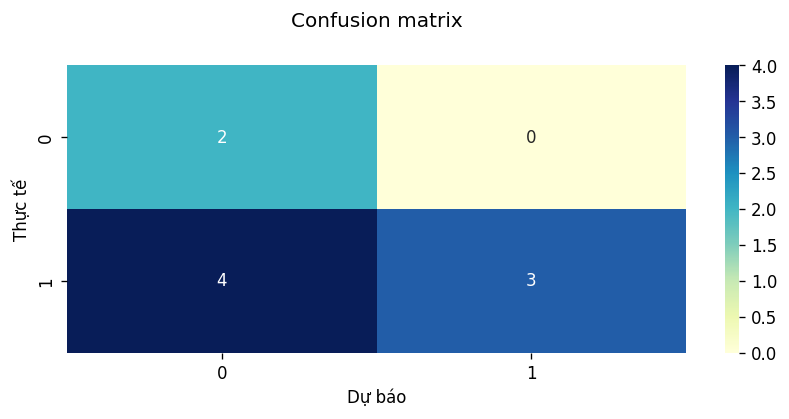

In [207]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Thực tế')
plt.xlabel('Dự báo')

In [208]:
from sklearn import metrics
from sklearn.metrics import classification_report
metrics.accuracy_score(y_test, y_pred)

0.5555555555555556

In [226]:
a = input("Enter the outlook value (sunny:2, rainy:1, overcast:1): ")
while a not in ('0', '1', '2'):
    a = input("Invalid input. Please enter the outlook value again (0 = sunny, 1 = overcast, 2 = rainy): ")
b = input("Enter the temperature value(mild:2, hot: 1, cold 0): ")
c = input("Enter the humidity value(high:0, normal: 1): ")
d = input("Enter the wind value(strong 0, normal:1): ")
new_data = {
    'outlook': [a],
    'temperature': [b],
    'humidity': [c],
    'wind': [d],
}
new_data_df = pd.DataFrame.from_dict(new_data)
# remove feature names from the DataFrame
new_data_df_encoded = new_data_df.values

# add the new data to X
X_encoded = np.concatenate([X, new_data_df_encoded], axis=0)

# predict the target variable for the new data
new_predictions = model_knn.predict(X_encoded[-1:])

# print the predictions
if new_predictions == 1: print('play is yes')
else: print('play is no')

Enter the outlook value (sunny:2, rainy:1, overcast:1): 8
Invalid input. Please enter the outlook value again (0 = sunny, 1 = overcast, 2 = rainy): 7
Invalid input. Please enter the outlook value again (0 = sunny, 1 = overcast, 2 = rainy): 1
Enter the temperature value(mild:2, hot: 1, cold 0): 0
Enter the humidity value(high:0, normal: 1): 1
Enter the wind value(strong 0, normal:1): 0
play is no
